In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving car.csv to car.csv


In [ ]:
df=pd.read_csv("car.csv")
print(df)
df.max()

     buying  maint  doors  persons lug_boot safety  unacc
0         3  vhigh      2        2    small    med  unacc
1         3  vhigh      2        2    small   high  unacc
2         3  vhigh      2        2      med    low  unacc
3         3  vhigh      2        2      med    med  unacc
4         3  vhigh      2        2      med   high  unacc
..      ...    ...    ...      ...      ...    ...    ...
194       1   high      5        2      big    low  unacc
195       1   high      5        2      big    med  unacc
196       1   high      5        2      big   high  unacc
197       1   high      5        4    small    low  unacc
198       1   high      5        4    small    med  unacc

[199 rows x 7 columns]


buying          3
maint       vhigh
doors           5
persons         4
lug_boot    small
safety        med
unacc       unacc
dtype: object

In [48]:
buying= df.iloc[:,[0,3]]
persons= df.iloc[:,3]

In [49]:
print(buying)


     buying  persons
0         3        2
1         3        2
2         3        2
3         3        2
4         3        2
..      ...      ...
194       1        2
195       1        2
196       1        2
197       1        4
198       1        4

[199 rows x 2 columns]


In [50]:
print(persons)

0      2
1      2
2      2
3      2
4      2
      ..
194    2
195    2
196    2
197    4
198    4
Name: persons, Length: 199, dtype: int64


In [51]:
from sklearn.model_selection import train_test_split


In [52]:
buying_train, buying_test, persons_train, persons_test = train_test_split(buying, persons, test_size=0.25, random_state=0)


In [53]:
print(buying_train, buying_test)

     buying  persons
71        2        2
196       1        2
86        2        2
96        2        4
149       1        4
..      ...      ...
67        2        4
192       1        2
117       2        4
47        3        4
172       1        4

[149 rows x 2 columns]      buying  persons
18        3        4
169       1        2
106       2        2
92        2        4
176       1        4
183       1        2
5         3        2
139       1        2
12        3        4
160       1        4
61        2        2
124       1        4
164       1        2
145       1        4
80        2        2
7         3        2
33        3        2
129       1        4
37        3        4
74        2        2
159       1        4
144       1        4
45        3        4
158       1        4
60        2        2
122       1        4
178       1        4
184       1        2
97        2        4
44        3        4
16        3        4
55        2        2
83        2        2
110       

In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
st_buying= StandardScaler()
buying_train= st_buying.fit_transform(buying_train)
buying_test= st_buying.transform(buying_test)




In [56]:
print(buying_test)

[[ 1.40463686  0.98006444]
 [-1.14769109 -1.02034107]
 [ 0.12847288 -1.02034107]
 [ 0.12847288  0.98006444]
 [-1.14769109  0.98006444]
 [-1.14769109 -1.02034107]
 [ 1.40463686 -1.02034107]
 [-1.14769109 -1.02034107]
 [ 1.40463686  0.98006444]
 [-1.14769109  0.98006444]
 [ 0.12847288 -1.02034107]
 [-1.14769109  0.98006444]
 [-1.14769109 -1.02034107]
 [-1.14769109  0.98006444]
 [ 0.12847288 -1.02034107]
 [ 1.40463686 -1.02034107]
 [ 1.40463686 -1.02034107]
 [-1.14769109  0.98006444]
 [ 1.40463686  0.98006444]
 [ 0.12847288 -1.02034107]
 [-1.14769109  0.98006444]
 [-1.14769109  0.98006444]
 [ 1.40463686  0.98006444]
 [-1.14769109  0.98006444]
 [ 0.12847288 -1.02034107]
 [-1.14769109  0.98006444]
 [-1.14769109  0.98006444]
 [-1.14769109 -1.02034107]
 [ 0.12847288  0.98006444]
 [ 1.40463686  0.98006444]
 [ 1.40463686  0.98006444]
 [ 0.12847288 -1.02034107]
 [ 0.12847288 -1.02034107]
 [ 0.12847288 -1.02034107]
 [ 1.40463686  0.98006444]
 [-1.14769109 -1.02034107]
 [-1.14769109 -1.02034107]
 

In [57]:
from sklearn.tree import DecisionTreeClassifier
clf= DecisionTreeClassifier(criterion='entropy',random_state=0)
clf.fit(buying_train,persons_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [58]:
persons_pred= clf.predict(buying_test)
print(persons_pred)

[4 2 2 4 4 2 2 2 4 4 2 4 2 4 2 2 2 4 4 2 4 4 4 4 2 4 4 2 4 4 4 2 2 2 4 2 2
 2 2 2 4 4 2 4 4 4 4 2 2 2]


In [59]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(persons_test,persons_pred)
print(cm)


[[25  0]
 [ 0 25]]


In [60]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [61]:
plt.style.use('classic')

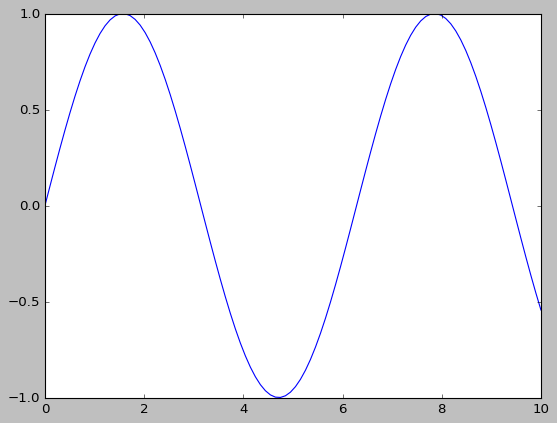

In [62]:
import matplotlib.pyplot as plt
import numpy as np
persons_pred= np.linspace(0, 10, 100)
plt.plot(persons_pred, np.sin(persons_pred))
plt.show()

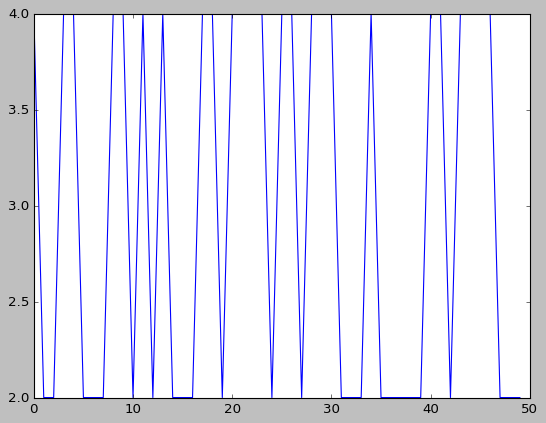

In [ ]:
persons_pred= clf.predict(buying_test)
plt.plot(persons_pred)
plt.show()

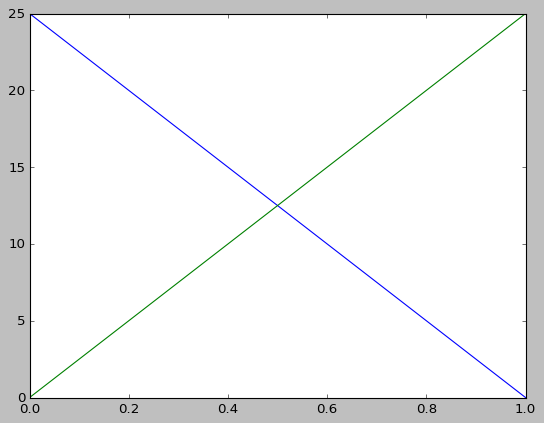

In [ ]:
cm= confusion_matrix(persons_test,persons_pred)
plt.plot(cm)
plt.show()


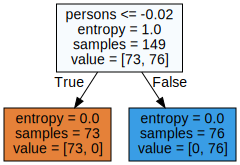

In [64]:
from sklearn.tree import export_graphviz
import graphviz
graphviz.Source(export_graphviz(clf,feature_names=buying.columns,filled=True))

[Text(0.5, 0.75, 'X[1] <= 3.0\ngini = 0.5\nsamples = 199\nvalue = [98, 101]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 98\nvalue = [98, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 101\nvalue = [0, 101]')]

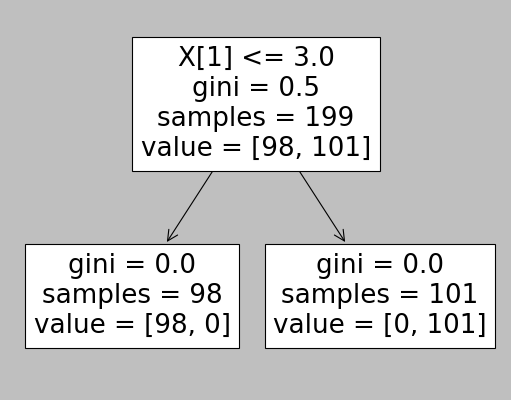

In [ ]:
from sklearn import tree
buying,persons=buying.data,persons.data
clf=tree.DecisionTreeClassifier()
clf=clf.fit(buying,persons)
tree.plot_tree(clf)